In [1]:
import sys
import os

import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot as plt
import numpy as np

sys.path.append(os.getcwd())
from load_data import *
from plotting_tools import *
from crystalcluster import CrystalCluster

sys.path.append('../3_score/')
from optimize import Scores

In [2]:
def sim2(x, y, w=None):
    if w:
        return np.dot(np.sqrt(np.multiply(x,w)), np.sqrt(np.multiply(y,w)))
    return np.dot(np.sqrt(x), np.sqrt(y))

def sim(x, y, w=None):
    x1 = x
    y1 = y
    if w:
        x1 = np.multiply(x, w)
        y1 = np.multiply(y, w)
    if sum(x1) == 0 or sum(y1) == 0: return np.nan
    return np.dot(x1, y1)/float((np.dot(x1, x1)+np.dot(y1, y1)-np.dot(x1,y1)))

In [3]:
def get_cluster_similarities(cluster, fp2d, fp3d, ai):
    all_data = {'fp2d':[], 'fp3d':{i:[] for i in range(-1,6)},'n':len(cluster)}        
    for i in range(len(cluster)):
        for j in range(i+1, len(cluster)):
            l1 = cluster[i]
            l2 = cluster[j]

            all_data['fp2d'].append(sim_f(fp2d[l1], fp2d[l2]))
            all_data['fp3d'][-1].append(sim_f(fp3d[l1], fp3d[l2]))
            
            #if sim_f(fp3d[l1], fp3d[l2]) == 0:
            #    print l1, l2

            for k, i_list in enumerate(i_groups):
                wk = [1 if ai[x][1] in i_list else 0 for x in range(len(ai))]
                all_data['fp3d'][k].append(sim_f(fp3d[l1], fp3d[l2], wk))
                
    return all_data

In [4]:
get_ipython().magic(u'matplotlib inline')

i_groups = [[2,3],[4],[5],[6,7],[8],[9]]
legend = {
    -1:'All Interaction Types',
    0:'Hydrogen Bonds',
    1:'Salt Bridges',
    2:'Pi-Pi Interactions',
    3:'Pi-Cation Interactions',
    4:'Metal Coordination',
    5:'Hydrophobic Contacts'
}

u_lig = lambda x:len(os.listdir('/scratch/PI/rondror/docking_data/{}/final_ligands'.format(x)))
all_datasets = ['pdbbind_combo/{}'.format(s) for s in os.listdir('/scratch/PI/rondror/docking_data/pdbbind_combo')]
all_datasets.sort(key=lambda x: -u_lig(x))
all_datasets = list(filter(lambda x: u_lig(x) >= 15, all_datasets))

all_datasets += ['B1AR_all','B2AR_all']# + all_datasets

all_data = {}

sim_f = sim2

for num, receptor in enumerate(all_datasets):
    print num, receptor, u_lig(receptor)
    (xcrystals, xglides) = load_data(receptor,
                                     'crystals_only',
                                     #w=[0,0,0,0,0,0,0,0,0,0.02,0,0,0],
                                     w=[0,0,1,1,1,.5,1,1,1,0.02,0,0,0],
                                     glide_ifp='xglide8',
                                     crystal_ifp='xcrystal8')



    fp2d = load_2d_fp(receptor, xcrystals)

    for n in [1]:#range(1,2):#,5):#[1,2]:#, 2]:#2, 4]:#, 8]:
    
        cc = CrystalCluster(xcrystals, n, [i for i in range(12)])
        ai, fp3d = cc.get_fp_vectors(xcrystals.keys())
        
        #if min([len(cl) for c, cl in cc.lig_clusters.items()]) < 2: break
        
        total_c_score = 0
        total_c_denom = 0
        for cnum, cluster in cc.lig_clusters.items():
            #print n
            all_data[receptor] = get_cluster_similarities(cluster, fp2d, fp3d, ai)
            total_c_score += sum(all_data[receptor]['fp3d'][-1])
            total_c_denom += len(cluster)*(len(cluster) - 1)
            #print cnum, len(cluster), np.mean(ugh['fp3d'][-1])
            #plt.plot(np.mean(ugh['fp2d']), np.mean(ugh['fp3d'][-1]), '.', markersize=ugh['n'], label=receptor)#ugh['n']
            #for i in [-1]:#range(-1, 6):
            #    plt.plot(ugh['fp2d'], ugh['fp3d'][i], '.', markersize=5, 
            #             label='c {}.{}. size: {}, score: {}'.format(n, cnum+1, len(cluster), np.mean(ugh['fp3d'][-1])))
                #plt.title()
            #c_score = sum(ugh['fp3d'][-1])/float(len(cluster)*(len(cluster) - 1))
            #if c_score >= 7:
            #    print '-- {}.{}: Size: {}, Score: {}'.format(n, cnum+1, len(cluster), c_score)
        print '- {} cluster score: {}'.format(n, total_c_score/float(total_c_denom))
    #plt.xlim(xmin=-1)
    #plt.ylim(ymin=-1)
    #plt.title(receptor)
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #plt.show()
            #if np.mean(ugh['fp3d'][-1]) < min_sim:
            #    print 'new min!', receptor, np.mean(ugh['fp3d'][-1])
            #    min_sim = np.mean(ugh['fp3d'][-1])

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#xmin, xmax = plt.xlim()
#ymin, ymax = plt.ylim()
#plt.xlim(xmin=-1)
#plt.xlim(xmax=xmax+2)
#plt.ylim(ymin=-1)
#plt.ylim(ymax=ymax+2)
#plt.show()

0 pdbbind_combo/P00918 191
- 1 cluster score: 3.26946559244
1 pdbbind_combo/P00760 87
- 1 cluster score: 4.69982780827
2 pdbbind_combo/P00734 82
- 1 cluster score: 5.20256924612
3 pdbbind_combo/P00742 61
- 1 cluster score: 5.98599544157
4 pdbbind_combo/P07900 60
- 1 cluster score: 3.93933741996
5 pdbbind_combo/P03366 45
- 1 cluster score: 9.24581798882
6 pdbbind_combo/P03367 42
- 1 cluster score: 7.69228887945
7 pdbbind_combo/P18031 39
- 1 cluster score: 6.36389037104
8 pdbbind_combo/P56817 35
- 1 cluster score: 5.36868589611
9 pdbbind_combo/P06202 29
- 1 cluster score: 16.012107474
10 pdbbind_combo/P00749 28
- 1 cluster score: 3.49640542972
11 pdbbind_combo/P61823 28
- 1 cluster score: 2.92200726739
12 pdbbind_combo/P00489 26
- 1 cluster score: 4.91363396436
13 pdbbind_combo/Q16539 25
- 1 cluster score: 5.83150521159
14 pdbbind_combo/P19491 24
- 1 cluster score: 5.69644172567
15 pdbbind_combo/P39900 24
- 1 cluster score: 5.9662912624
16 pdbbind_combo/Q9Y233 24
- 1 cluster score: 3.717

/share/PI/rondror/software/miniconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:1057: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if aspect == 'normal':
/share/PI/rondror/software/miniconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:1062: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif aspect in ('equal', 'auto'):


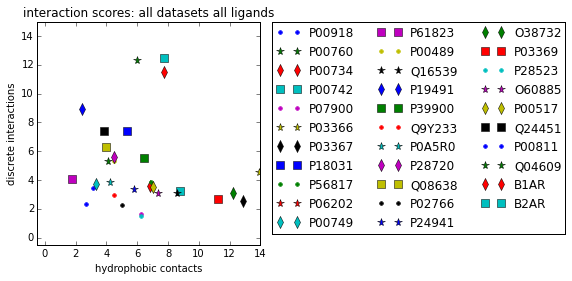

In [5]:
get_ipython().magic(u'matplotlib inline')
fig, ax = plt.subplots()
symb = ['.','*','d','s']
#for i in [-1,5]:#range(-1, 6):
for i, r in enumerate(all_datasets):
    name = r
    if '/' in name: name = name.split('/')[-1]
    if '_' in name: name = name.split('_')[0]
        
    #plt.plot(all_data[r]['fp2d'], all_data[r]['fp3d'][i], '.', label=r, markersize=10)
    #plt.plot([np.mean(all_data[r]['fp2d'])], [np.mean(all_data[r]['fp3d'][-1])], 
    #         symb[i%len(symb)], markersize=8, label=name)
    plt.plot([np.mean(all_data[r]['fp3d'][5])], [np.mean(all_data[r]['fp3d'][-1]) - np.mean(all_data[r]['fp3d'][5])], 
             symb[i%len(symb)], markersize=8, label=name)
#plt.plot([0,15],[0,15])
    #for j in range(len(summary['fp2d'])):
    #    plt.plot(summary['fp2d'][j], summary['fp3d'][i][j], '.', markersize=summary['n'][j])
        
#plt.axis([-0.05, 1.05, -0.05, 1.05])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=3)
plt.ylabel('discrete interactions')
plt.xlabel('hydrophobic contacts')
plt.title('interaction scores: all datasets all ligands')
plt.xlim(xmin=-.5)
plt.ylim(ymin=-.5)
plt.ylim(ymax=15)
x0, x1 = plt.xlim()
y0, y1 = plt.ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))
#plt.show()
        
#    plt.legend()
#plt.xlabel('2d similarity')
#plt.ylabel('all interactions')
        #plt.axis([-0.05,1.05,-0.05,1.05])
#    plt.title('Summary of PDBbind datasets: {}'.format(legend[i]))
plt.show()

In [ ]:
print xcrystals.keys()#['3NY8'].keys()
l1 = '3NY8'
l2 = '3NY9'
for i in range(12):
    for r in sorted(xcrystals[l1].keys()):
        if r in xcrystals[l2]:
            if xcrystals[l1][r][i] > 0 and xcrystals[l2][r][i] > 0:
                if (xcrystals[l1][r][i]*xcrystals[l2][r][i])**0.5 > 0.7:
                    print r, i, (xcrystals[l1][r][i]*xcrystals[l2][r][i])**0.5